In [161]:
import pandas as pd
from matplotlib import pyplot as plt
from pandas.plotting import andrews_curves
import seaborn as sns
import numpy as np
%matplotlib inline

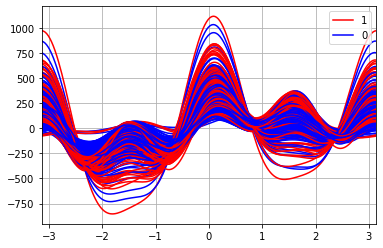

In [162]:
df = pd.read_csv('C:/Users/saifr/Desktop/diabetes.csv')
x = pd.plotting.andrews_curves(df,'Outcome', color=('red','blue'))

In [163]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [164]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [165]:
df.shape

(768, 9)

In [166]:
#df['Glucose'] = df['Glucose'].replace(0, df['Glucose'].mean())

In [167]:
df['BloodPressure'] = df['BloodPressure'].replace(0, df['BloodPressure'].mean())

In [168]:
df['SkinThickness'] = df['SkinThickness'].replace(0, df['SkinThickness'].mean())

In [169]:
df['Insulin'] = df['Insulin'].replace(0, df['Insulin'].mean())

In [170]:
df['BMI'] = df['BMI'].replace(0, df['BMI'].mean())

In [171]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137,40.0,35.000000,168.000000,43.1,2.288,33,1


In [172]:
df.shape

(768, 9)

In [173]:
from sklearn.model_selection import train_test_split
feature_columns = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']

X = df[feature_columns]
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=30)

In [174]:
def outlier (dataFrame):
   for feature_columns in dataFrame.columns:
    Q1 = df[feature_columns].quantile(0.25)
    Q3 = df[feature_columns].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR
    dataFrame = dataFrame[(dataFrame[feature_columns] > lower_limit)|(dataFrame[feature_columns] < upper_limit)]
    return dataFrame

In [175]:
df = outlier(df)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2,122,70.0,27.000000,79.799479,36.8,0.340,27,0
765,5,121,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1,126,60.0,20.536458,79.799479,30.1,0.349,47,1


In [176]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
352,3,61,82.0,28.000000,79.799479,34.400000,0.243,46
129,0,105,84.0,20.536458,79.799479,27.900000,0.741,62
387,8,105,100.0,36.000000,79.799479,43.300000,0.239,45
244,2,146,76.0,35.000000,194.000000,38.200000,0.329,29
366,6,124,72.0,20.536458,79.799479,27.600000,0.368,29
...,...,...,...,...,...,...,...,...
145,0,102,75.0,23.000000,79.799479,31.992578,0.572,21
763,10,101,76.0,48.000000,180.000000,32.900000,0.171,63
140,3,128,78.0,20.536458,79.799479,21.100000,0.268,55
500,2,117,90.0,19.000000,71.000000,25.200000,0.313,21


In [177]:
y_train

352    0
129    1
387    1
244    0
366    1
      ..
145    0
763    0
140    0
500    0
421    0
Name: Outcome, Length: 614, dtype: int64

In [178]:
X_train.shape

(614, 8)

In [179]:
y_train.shape

(614,)

In [180]:
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(),LogisticRegression())
model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [181]:
y_predict= model.predict(X_test)

In [182]:
print(y_predict)

[0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0
 1 1 0 0 1 0 0 1 1 1 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0 1 0 0
 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 1 1 0 0 0 0 0 1
 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 1 0
 0 1 0 0 1 0]


In [183]:
model.score(X_test, y_test)

0.7922077922077922

In [184]:
model.score(X_train, y_train)

0.7752442996742671

In [185]:
from sklearn.metrics import confusion_matrix, classification_report
confusion = confusion_matrix(y_test, y_predict)
print(confusion)

[[91 13]
 [19 31]]


<AxesSubplot:>

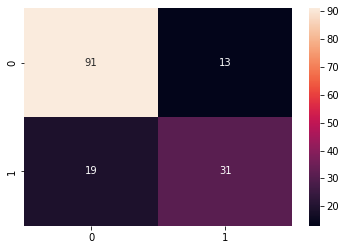

In [186]:
sns.heatmap(confusion, annot = True)

In [187]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       104
           1       0.70      0.62      0.66        50

    accuracy                           0.79       154
   macro avg       0.77      0.75      0.76       154
weighted avg       0.79      0.79      0.79       154

